In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv('input/train.csv')

In [2]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df_train['SalePrice'].describe()
#df.isnull().any()
#df.columns

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.8828757597682129
6.536281860064529


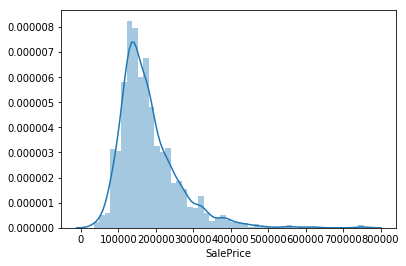

In [3]:
import seaborn as sns
sns.distplot(df_train['SalePrice'])

print(df_train['SalePrice'].skew()) # 歪度
print(df_train['SalePrice'].kurt()) #尖度

# 対数正規分布に従う
# 歪度　尖度　を調べたのはそのため

(-0.5, 9.5, 0, 800000)

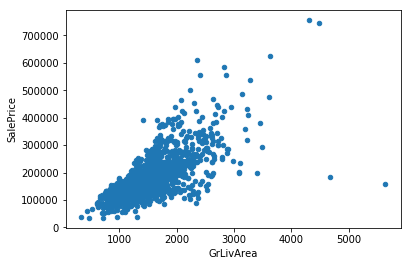

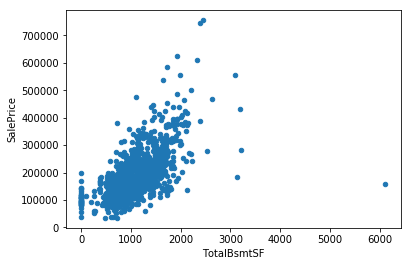

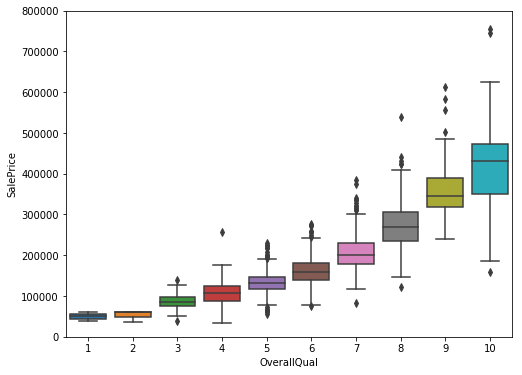

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# 散布図scatter pandasのDataFrameのメソッドに描画がある
df_train['GrLivArea'].describe()
var1='GrLivArea'
data1=pd.concat([df_train['SalePrice'],df_train[var1]],axis=1)
data1.plot(kind='scatter',x=var1,y='SalePrice')

var2='TotalBsmtSF'
data2=pd.concat([df_train['SalePrice'],df_train[var2]],axis=1)
data2.plot(kind='scatter',x=var2,y='SalePrice')                

var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

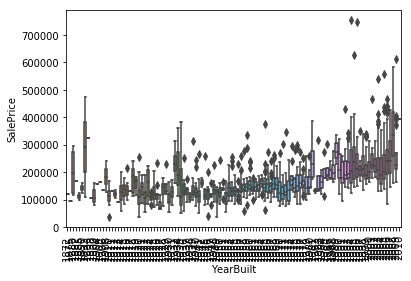

In [5]:
var4='YearBuilt'
data4=pd.concat([df_train['SalePrice'],df_train[var4]],axis=1)
#f,ax=plt.subplots(1,2,figsize=(16,12))
fig=sns.boxplot(x=var4,y='SalePrice',data=data4)
plt.xticks(rotation=90)

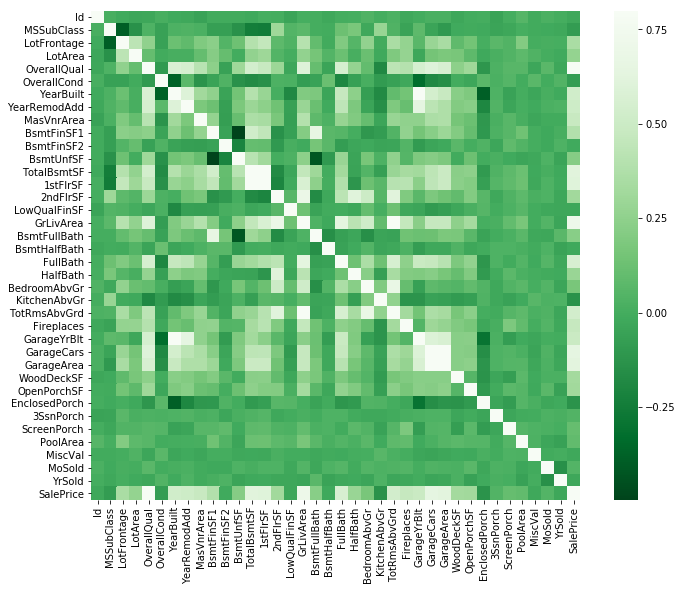

In [80]:
corr_mat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,vmax=.8,square=True,cmap='Greens_r')

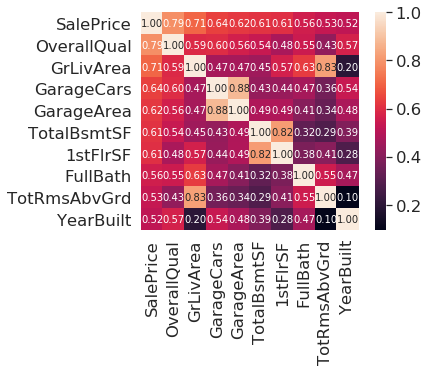

In [81]:
k=10
cols=corr_mat.nlargest(k,'SalePrice')['SalePrice'].index #上位１０のカラム名
cm=np.corrcoef(df_train[cols].values.T) # ピアソンの積率相関係数
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
#plt.show()

/home/nagae/anaconda3/envs/gpu-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


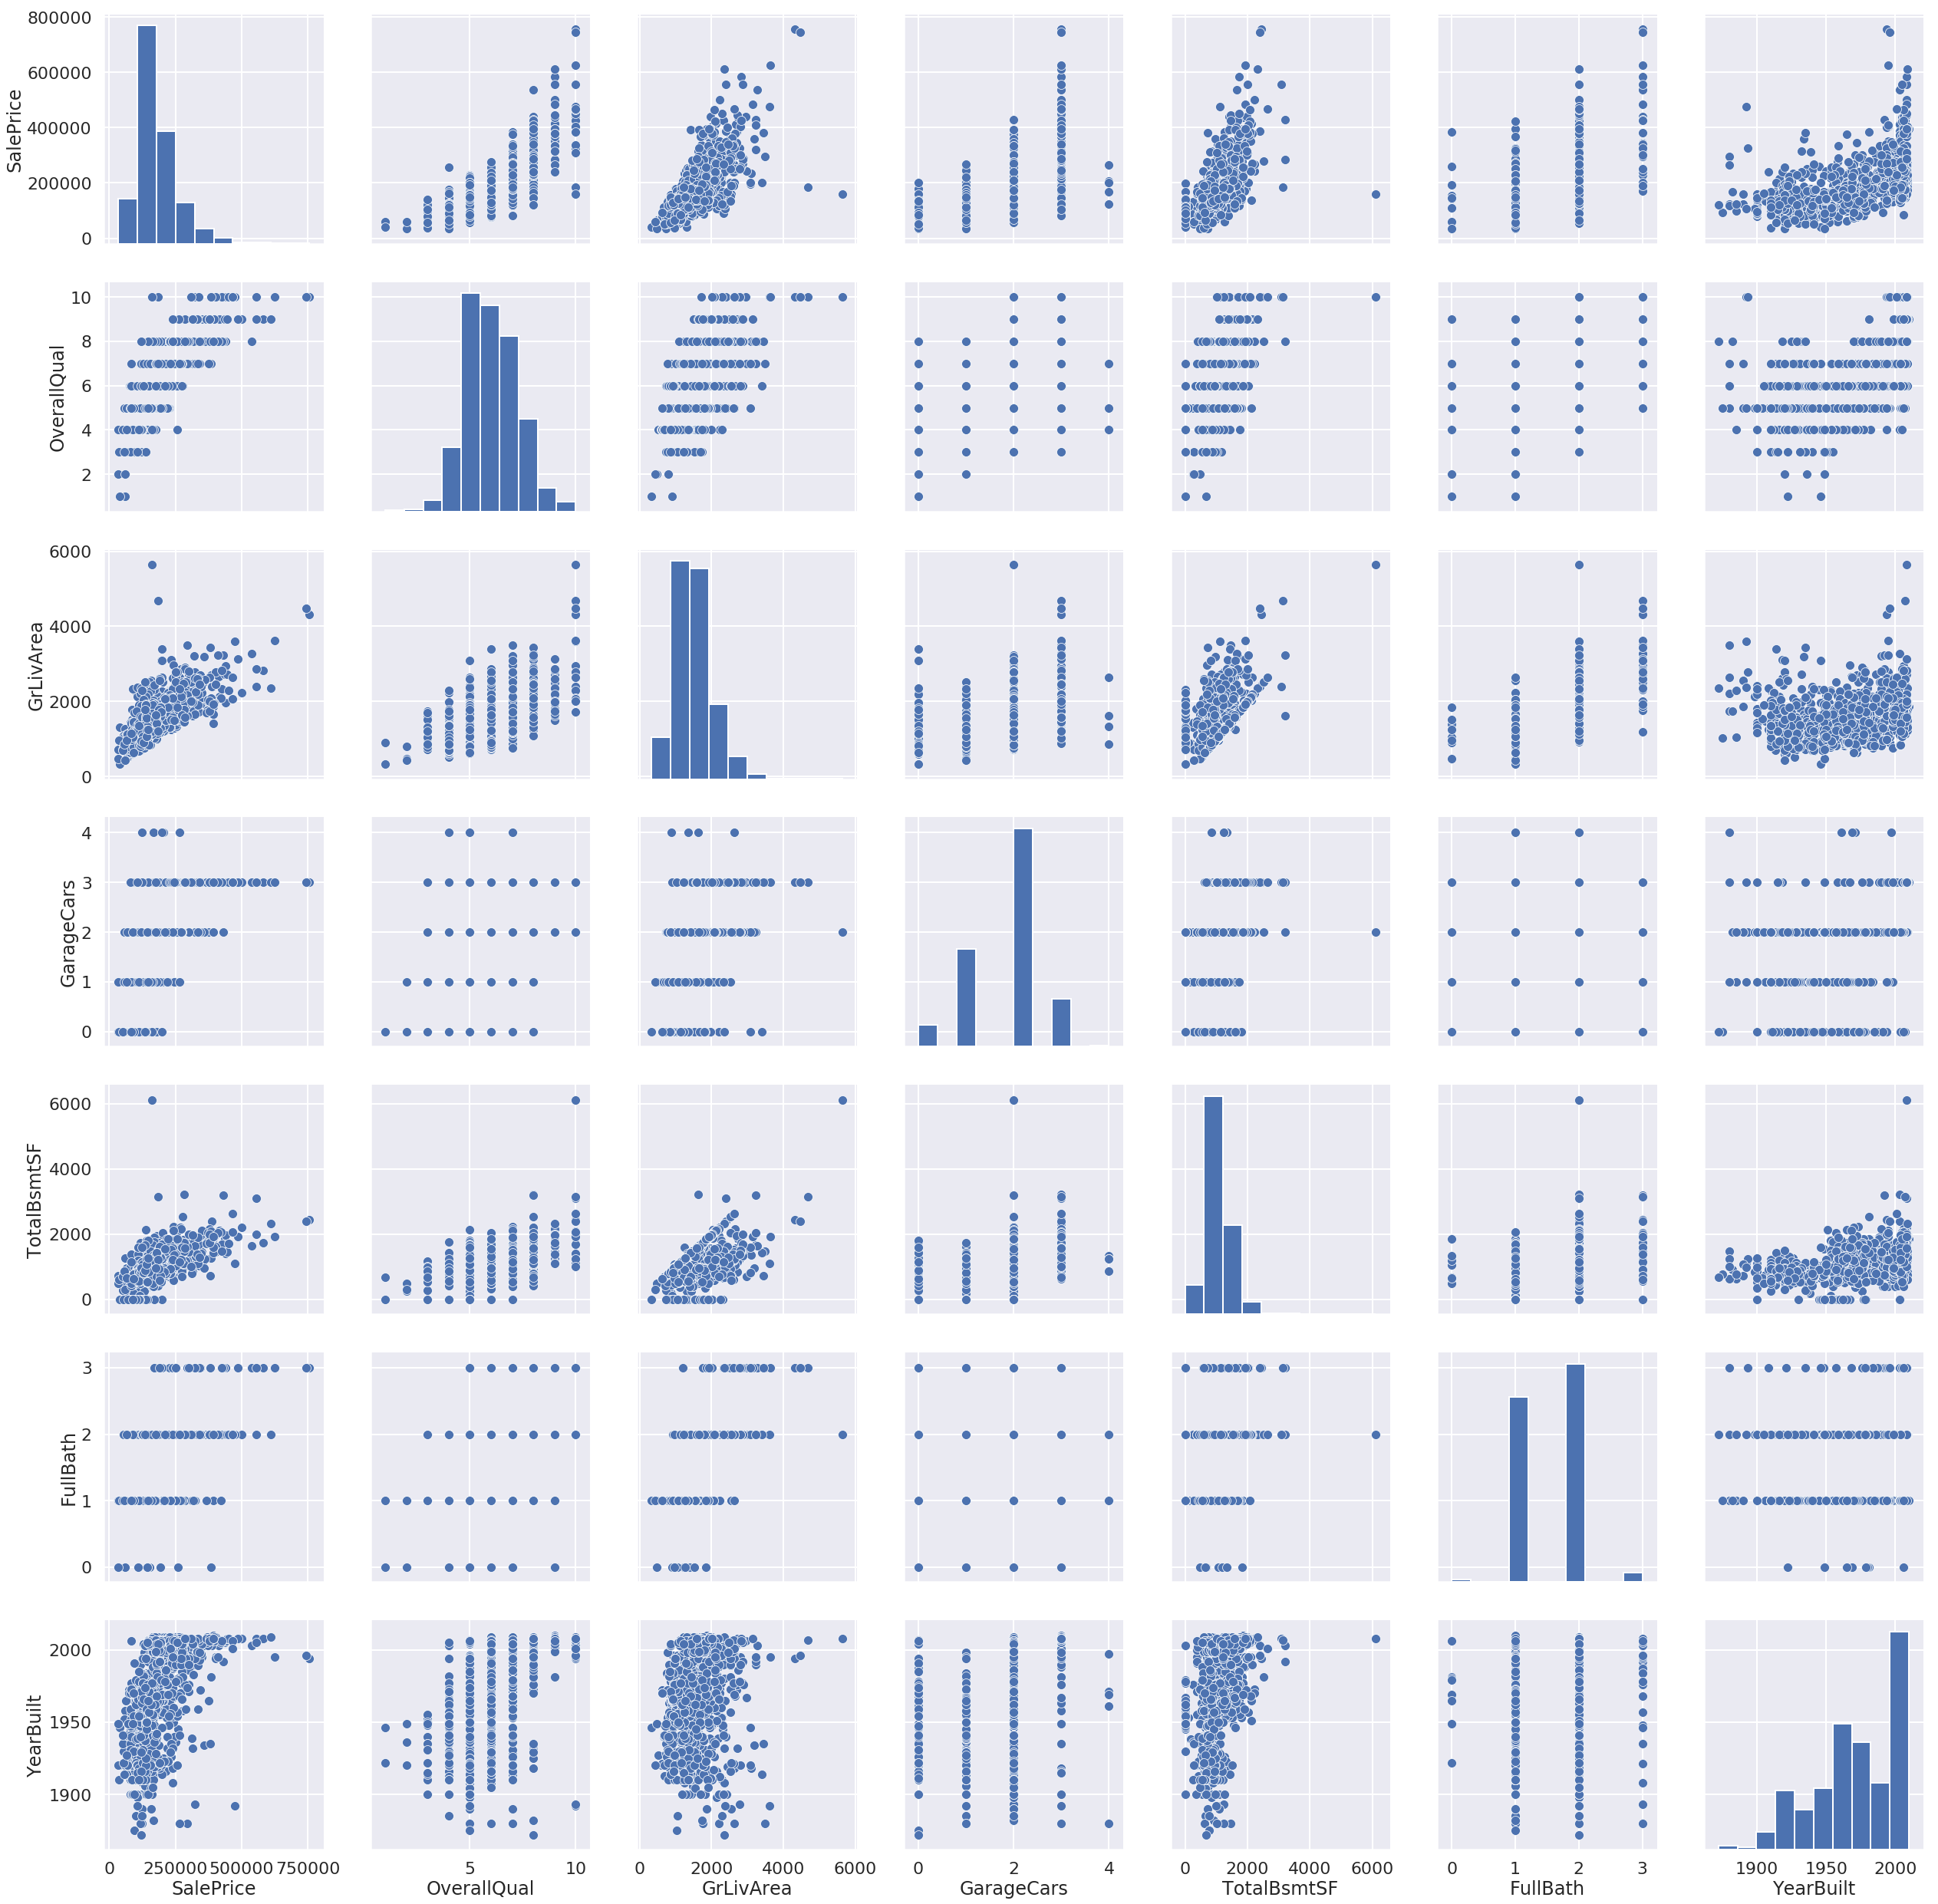

In [82]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set(context='poster')
sns.pairplot(df_train[cols],size=5)
plt.show()


In [83]:
# 欠損値の処理
total=df_train.isnull().sum().sort_values(ascending=False)
#count メソッドで欠損値でない要素数を取得。df_train.insnull()に対してなので、すべてのデータ数を取得している
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data

#df_train.describe
#print(df_train.count())
#print(df_train.isnull().count())
#df_train.info

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [84]:
df_train=df_train.drop((missing_data[missing_data['total']>1]).index,1)

df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)


In [85]:
df_train.isnull().sum()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
ExterQual        1459 non-

In [86]:
from sklearn.preprocessing import StandardScaler
#　標準化
stdsc=StandardScaler()
saleproce_scaled=stdsc.fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=saleproce_scaled[saleproce_scaled[:,0].argsort()][:10]

large_range=saleproce_scaled[saleproce_scaled[:,0].argsort()][:-10]

print(low_range)
print(large_range)

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 ...
 [ 3.57582371]
 [ 3.59470548]
 [ 3.70170215]]


/home/nagae/anaconda3/envs/gpu-env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nagae/anaconda3/envs/gpu-env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(-0.5, 9.5, 0, 800000)

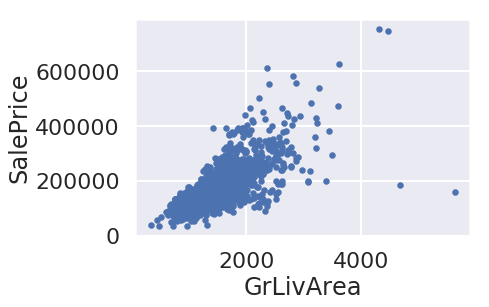

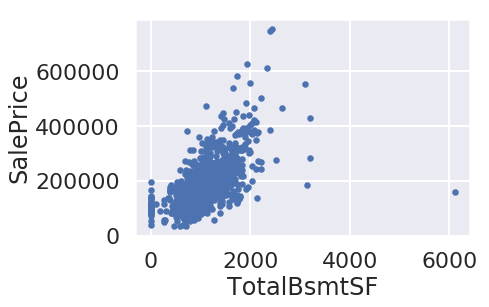

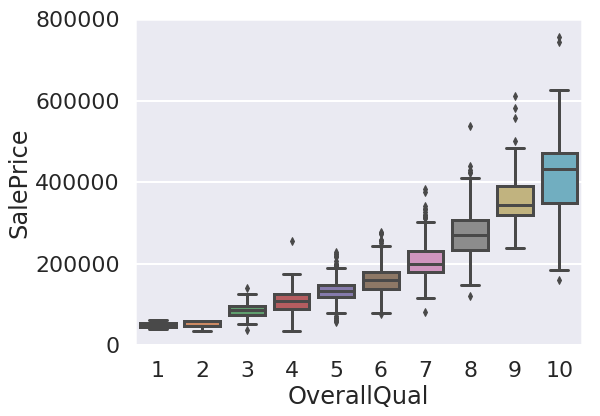

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

# 散布図scatter pandasのDataFrameのメソッドに描画がある

var1='GrLivArea'
data1=pd.concat([df_train['SalePrice'],df_train[var1]],axis=1)
data1.plot(kind='scatter',x=var1,y='SalePrice')

var2='TotalBsmtSF'
data2=pd.concat([df_train['SalePrice'],df_train[var2]],axis=1)
data2.plot(kind='scatter',x=var2,y='SalePrice')                

var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


In [88]:
# 降順はascending=False
df_train.sort_values(by='GrLivArea',ascending=False)
df_train[['Id','GrLivArea']].sort_values(by='GrLivArea',ascending=False)
print(df_train)
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==523].index)
df_train

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2        

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


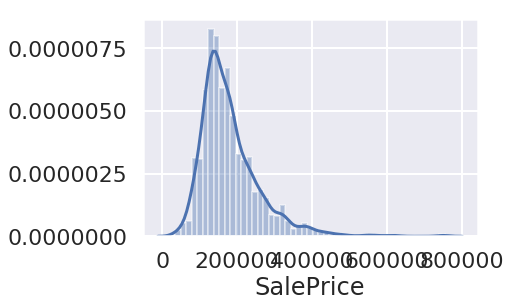

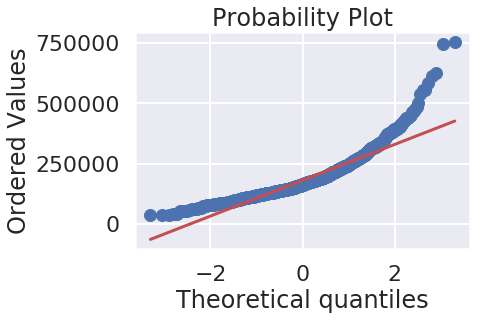

In [89]:
%matplotlib inline

# seaborn でhistgram
sns.distplot(df_train['SalePrice'])

# fig上にprobability plotを載せる
fig=plt.figure()

from scipy import stats
# QQプロット
# 直線状にのると正規分布らしい
res=stats.probplot(df_train['SalePrice'],plot=plt)

In [90]:
# logをとることで正規分布にのる
df_train['SalePrice']=np.log(df_train['SalePrice'])

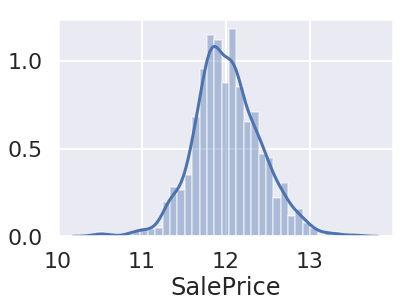

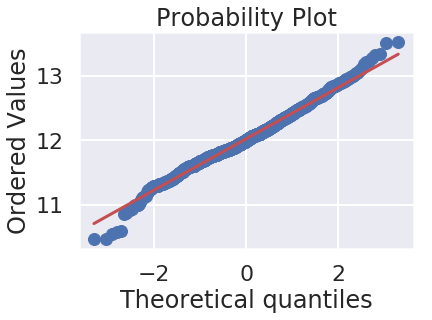

In [91]:
sns.distplot(df_train['SalePrice'])

fig=plt.figure()

res=stats.probplot(df_train['SalePrice'],plot=plt)

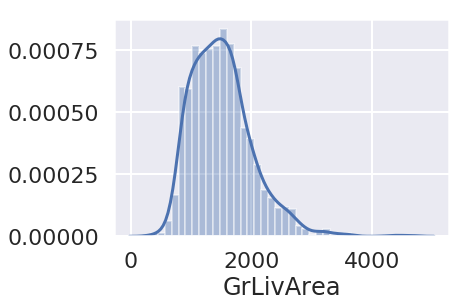

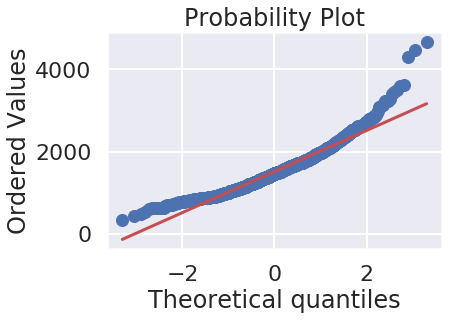

In [92]:
sns.distplot(df_train['GrLivArea'])
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

In [93]:
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

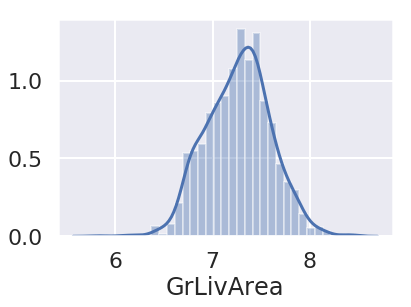

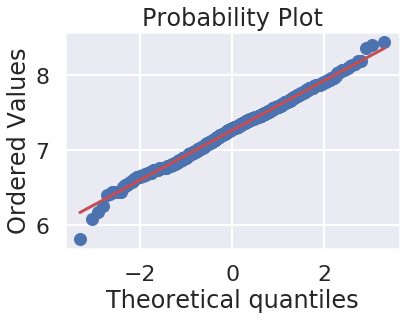

In [94]:
sns.distplot(df_train['GrLivArea'])
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

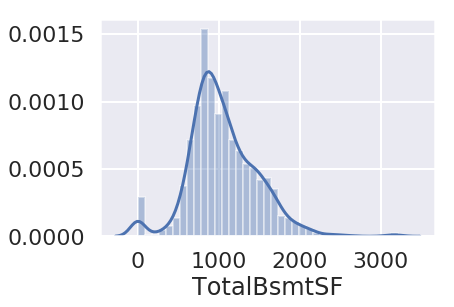

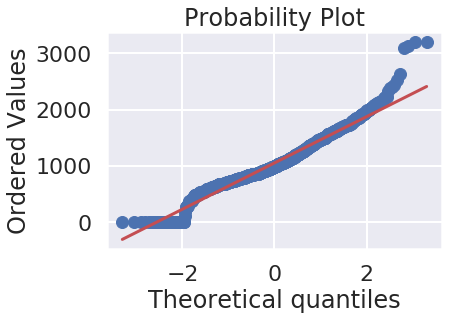

In [95]:
sns.distplot(df_train['TotalBsmtSF'])
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)

In [96]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
# TotalBsmtSF の値が0より大きければ1　小さければ0をいれる
df_train['HasBsmt']=0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt']=1

In [97]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])

/home/nagae/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(4, 8)

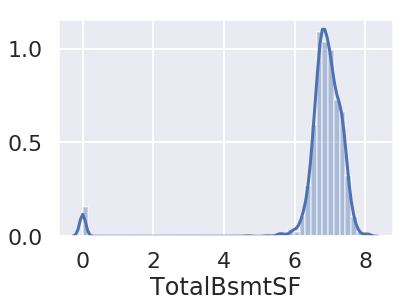

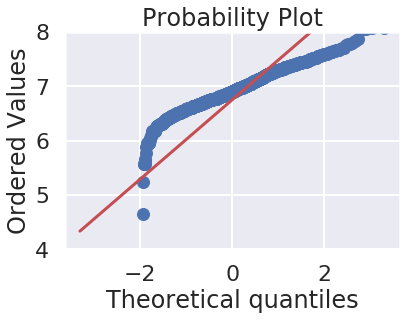

In [98]:
sns.distplot(df_train['TotalBsmtSF'])
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)
plt.ylim(4,8)

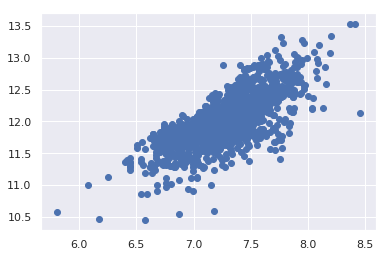

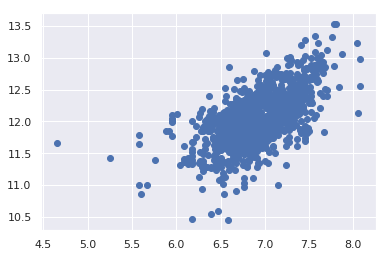

In [101]:
sns.set()
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
# 別々に
fig=plt.figure()
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [103]:
df_train[:20]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,1
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,320,0,0,700,10,2009,WD,Normal,11.870600,1
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,12.634603,1
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,350,11,2009,WD,Normal,12.206073,1
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,4,2008,WD,Abnorml,11.774520,1
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,2008,WD,Normal,11.678440,1


In [104]:
df_train=pd.get_dummies(df_train)


In [105]:
df_train[:20]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0
